In [1]:
import numpy as np
import scipy.special

In [65]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes for input, hidden, output layers:
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        #Link weight matrices, wih and who; Initialize random weights to start
        self.wih=np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        self.activation_function=lambda x: scipy.special.expit(x)
        #Activation function: Sigmoid
        
        pass
    
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array:
        inputs=np.array(inputs_list, ndmin=2).T
        targets=np.array(targets_list, ndmin=2).T
        
        #calculate signals into hidden layer:
        hidden_inputs=np.dot(self.wih, inputs)
        #calculate signals emerging from hidden layer:
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer:
        final_inputs=np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer:
        final_outputs=self.activation_function(final_inputs)
        
        #error Function (target-actual):
        output_errors=targets-final_outputs
        #hidden layer error is output_errors, split by weights, recombined at hidden nodes:
        hidden_errors=np.dot(self.who.T, output_errors)
        
        #update weights for links between hidden and output layers:
        self.who+=self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
        #update weights for links between input and hidden layers:
        self.wih+=self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        #convert inputs list to 2d array:
        inputs=np.array(inputs_list,ndmin=2).T
        
        #calculate signals into hidden layer:
        hidden_inputs=np.dot(self.wih,inputs)
        #calculate signals emerging from hidden layer:
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer:
        final_inputs=np.dot(self.who, hidden_outputs)
        #calculate signals emerging from final output layer:
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [21]:
input_nodes=3
hidden_nodes=3
output_nodes=3
learning_rate=0.3

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [23]:
n.query([1.0,0.5,-1.5])

array([[0.64769275],
       [0.35721309],
       [0.64822244]])

In [26]:
import requests

url1='http://www.pjreddie.com/media/files/mnist_train.csv'
url2='http://www.pjreddie.com/media/files/mnist_test.csv'

response = requests.get(url2)
test=response.content
csvfile=open('test.csv','wb')
csvfile.write(test)
csvfile.close()

In [66]:
data_file=open("test.csv", "r")
data_list=data_file.readlines()
data_file.close()

In [67]:
test=data_list[:10]
train=data_list[10:110]

In [68]:
all_values=train[0].split(',')

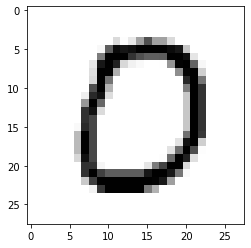

In [69]:
import matplotlib.pyplot

image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [70]:
scaled_input=(np.asfarray(all_values[1:])/255.0*0.99) + 0.01
#print(scaled_input)

In [71]:
onodes=10
targets=np.zeros(onodes)+0.01
targets[int(all_values[0])]=0.99

In [72]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# Fresh train on dataset:

In [75]:
import requests

# url2='http://www.pjreddie.com/media/files/mnist_test.csv'
# response = requests.get(url2)
# test=response.content
# csvfile=open('test.csv','wb')
# csvfile.write(test)
# csvfile.close()

data_file=open("test.csv", "r")
data_list=data_file.readlines()
data_file.close()

test=data_list[:10]
training=data_list[10:110]

In [76]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.3

mnist=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [77]:
#Train NN:

for record in training:
    all_values=record.split(',')
    inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets=np.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    mnist.train(inputs, targets)
    pass
    

In [78]:
#confirm against test set (10 records):
all_values=test[0].split(',')
print(all_values[0])

7


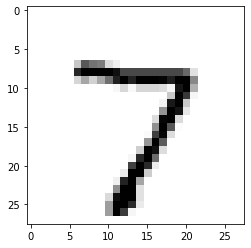

In [79]:
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [80]:
mnist.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.03812664],
       [0.10666234],
       [0.07906593],
       [0.03437299],
       [0.07572897],
       [0.05093392],
       [0.02767514],
       [0.48236019],
       [0.03270395],
       [0.2887899 ]])

In [97]:
all_values=test[9].split(',')
print(all_values[0])


9


In [98]:
mnist.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.04471062],
       [0.10000693],
       [0.05330034],
       [0.01650098],
       [0.18559029],
       [0.05266224],
       [0.04227358],
       [0.22661699],
       [0.03679442],
       [0.4838947 ]])

In [103]:
scorecard=[]
for record in test:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print(correct_label, "correct label")
    inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=mnist.query(inputs)
    label=np.argmax(outputs)
    print(label, "network answer")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass
    

7 correct label
7 network answer
2 correct label
1 network answer
1 correct label
1 network answer
0 correct label
0 network answer
4 correct label
4 network answer
1 correct label
1 network answer
4 correct label
9 network answer
9 correct label
9 network answer
5 correct label
4 network answer
9 correct label
9 network answer


In [102]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 0, 1, 0, 1]


# Add Epochs

In [107]:
len(data_list)

training=data_list[:8000]
test=data_list[8000:]

In [127]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.3

mnist2=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [128]:
epochs=10
for e in range(epochs):
    for record in training:
        all_values=record.split(',')
        inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        mnist2.train(inputs, targets)
    pass

In [129]:
scorecard=[]
for record in test:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    #print(correct_label, "correct label")
    inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=mnist2.query(inputs)
    label=np.argmax(outputs)
    #print(label, "network answer")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass


scorecard_array=np.asarray(scorecard)
print("performance=", scorecard_array.sum() / scorecard_array.size)

performance= 0.959


1 performance= 0.925
4 performance= 0.955
6 performance= 0.959
10 performance= 0.959